In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure

In [2]:
top500 = pd.read_csv('0.top_500_cro_it.csv')
top500.head(10)


,Naziv poslovnog subjekta,Mjesto,NKD2007,Opis šifre djelatnosti,Broj zaposlenih (sati rada),Dobit/gubitak razdoblja,Kapital i rezerve,Ukupan prihod
0,HRVATSKI TELEKOM D.D.,ZAGREB,6110,Djelatnosti žičane telekomunikacije,3653,841265804,12274045213,6265933192
1,VIPNET D.O.O.,ZAGREB,6120,Djelatnosti bežične telekomunikacije,1362,56084658,898969544,3182633718
2,VIPNET USLUGE D.O.O.,ZAGREB,6120,Djelatnosti bežične telekomunikacije,72,51994178,358475768,130827093
3,HEWLETT PACKARD D.O.O.,ZAGREB,6202,Savjetovanje u vezi s računalima,69,36063456,52176975,121008923
4,MERCURY PROCESSING SERVICES INTERNATIONAL D.O.O.,ZAGREB - TRNJE,6311,"Obrada podataka, usluge poslužitelja i djelatn...",210,34306192,312734095,255696633
5,ODAŠILJAČI I VEZE D.O.O.,ZAGREB,6120,Djelatnosti bežične telekomunikacije,291,31249205,326604784,221542985
6,MANAS D.O.O.,SPLIT,6201,Računalno programiranje,82,25859632,80779445,49911938
7,CROZ D.O.O.,ZAGREB,6201,Računalno programiranje,175,25126259,34347696,128712120
8,KING ICT D.O.O.,ZAGREB,6201,Računalno programiranje,308,23426751,98036621,625785704
9,COMBIS D.O.O.,ZAGREB,6203,Upravljanje računalnom opremom i sustavom,366,22335226,157072961,644982348


<class 'tuple'>


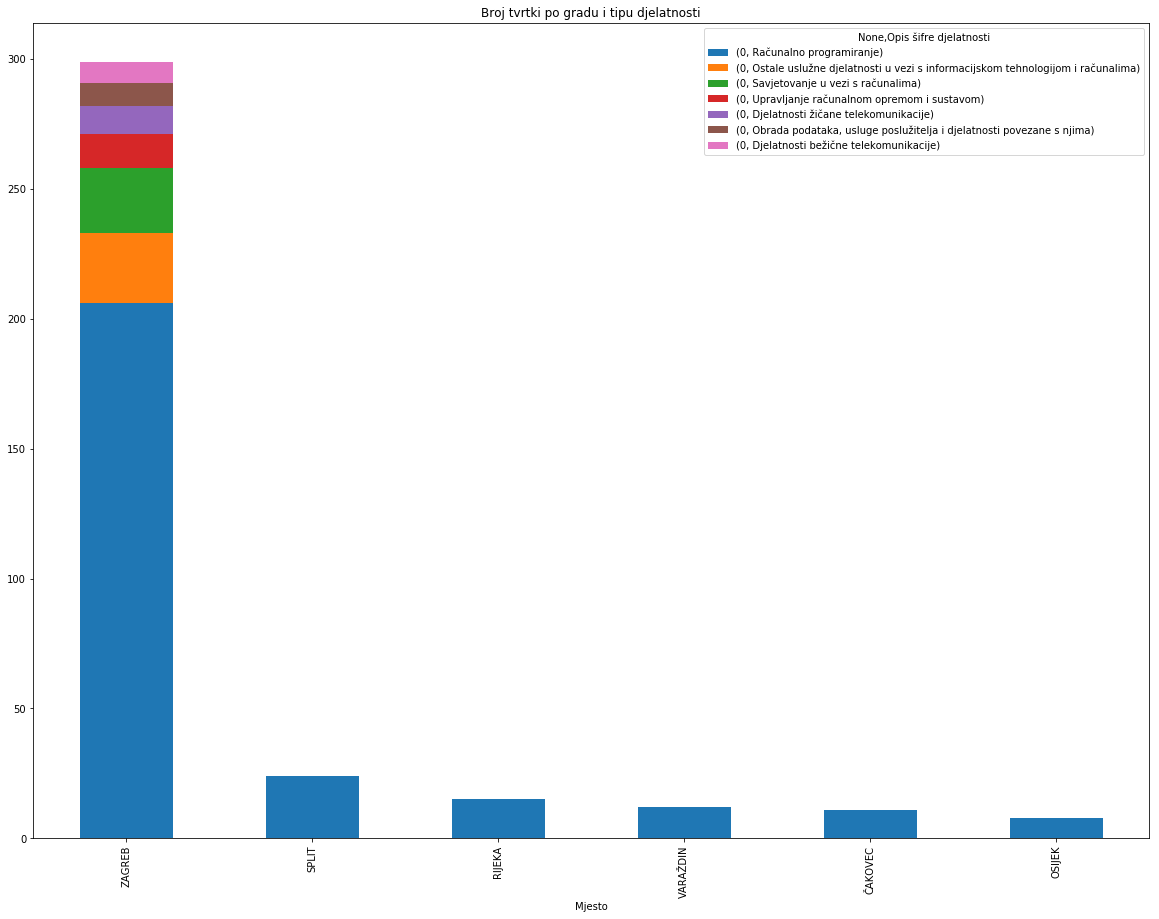

In [104]:
numberOfCompaniesByCity = top500.groupby(['Mjesto','Opis šifre djelatnosti']).size().to_frame().sort_values([0], ascending=False).head(12).unstack()                                                                                     

djelatnost = top500['Opis šifre djelatnosti'].unique()

print(type(tuple(list((djelatnost)))))

djel= tuple(list((djelatnost)))

plot = numberOfCompaniesByCity.plot(kind='bar',
    stacked=True,
    title='Broj tvrtki po gradu i tipu djelatnosti',
    legend=True,
    figsize=(20,15))
#.legend(djel)
plot.get_figure().savefig("NumberOfCompaniesByCity.png")



In [3]:
# color dictionary
nkdColorNameDict = {
         6110 : "firebrick", 
         6120 : "chocolate", 
         6202 : "gold", 
         6311 : "darkolivegreen", 
         6201 : "palegreen", 
         6203 : "deepskyblue", 
         6209 : "teal", 
         6190 : "navy", 
         6399 : "indigo", 
         6130 : "magenta"
    }
top500['color_name'] = top500['NKD2007'].map(nkdColorNameDict)

#colors = ["firebrick", "chocolate", "gold", "darkolivegreen","palegreen", "deepskyblue","teal", "navy", "indigo", "magenta"]

colors = tuple(list(top500['color_name']))


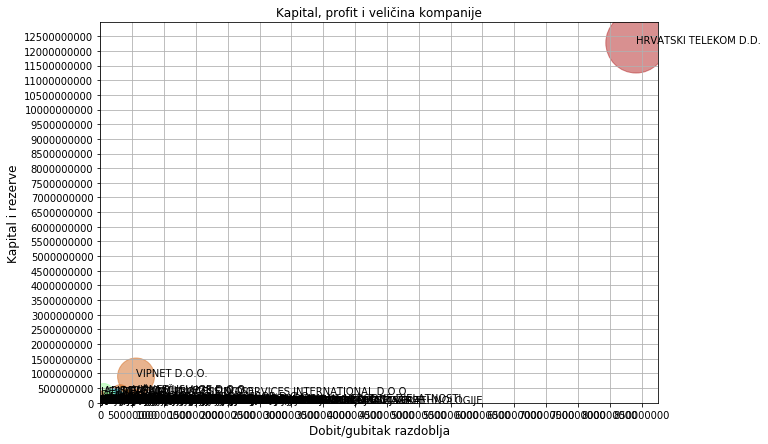

In [15]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.axis([0, 876275804, 0, 12974055213])
plt.locator_params(nbins=30)
plt.rcParams['axes.formatter.useoffset'] = False
ax = plt.gca()
ax.ticklabel_format(style='plain')

for index, row in top500.iterrows():
    plt.annotate(s=row['Naziv poslovnog subjekta'],xy=(row['Dobit/gubitak razdoblja'], row['Kapital i rezerve'])) 
    
plt.title('Kapital, profit i veličina kompanije', fontsize='large')
plt.xlabel('Dobit/gubitak razdoblja', fontsize='large')
plt.ylabel('Kapital i rezerve', fontsize='large')
plt.grid(b=True, which='both', axis='both')

plt.scatter(top500[['Dobit/gubitak razdoblja']], top500[['Kapital i rezerve']],
            s=top500[['Broj zaposlenih (sati rada)']], 
            c=colors,
            alpha=0.5)

plt.savefig('CapitalProfitAndCompanySize1.png')


In [5]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.axis([0, 22000000, 0, 60000000])
plt.locator_params(nbins=20)
plt.rcParams['axes.formatter.useoffset'] = False
ax = plt.gca()
ax.ticklabel_format(style='plain')

for index, row in top500.iterrows():
    plt.annotate(s=row['Naziv poslovnog subjekta'],xy=(row['Dobit/gubitak razdoblja'], row['Kapital i rezerve'])) 
    
plt.title('Kapital, profit i veličina kompanije - ', fontsize='large')
plt.xlabel('Dobit/gubitak razdoblja', fontsize='large')
plt.ylabel('Kapital i rezerve', fontsize='large')
plt.grid(b=True, which='both', axis='both')

plt.scatter(top500[['Dobit/gubitak razdoblja']], top500[['Kapital i rezerve']],
            s=top500[['Broj zaposlenih (sati rada)']], 
            c=colors,
            alpha=0.5)

plt.savefig('CapitalProfitAndCompanySize2.png', dpi = 300)

ValueError: Image size of 42888x166860 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x1080 with 1 Axes>

In [11]:
plt.rcParams['figure.figsize'] = [20, 15]
#figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.axis([0, 8000000, 0, 10000000])
plt.locator_params(nbins=20)
plt.rcParams['axes.formatter.useoffset'] = False
ax = plt.gca()
ax.ticklabel_format(style='plain')

for index, row in top500.iterrows():
    plt.annotate(s=row['Naziv poslovnog subjekta'],xy=(row['Dobit/gubitak razdoblja'], row['Kapital i rezerve'])) 
    
plt.title('Kapital, profit i veličina kompanije', fontsize='large')
plt.xlabel('Dobit/gubitak razdoblja', fontsize='large')
plt.ylabel('Kapital i rezerve', fontsize='large')
plt.grid(b=True, which='both', axis='both')

plt.scatter(top500[['Dobit/gubitak razdoblja']], top500[['Kapital i rezerve']],
            s=top500[['Broj zaposlenih (sati rada)']], 
            c=colors,
            alpha=0.5)

plt.savefig('CapitalProfitAndCompanySize3.png', dpi = 300)

ValueError: Image size of 117569x1000882 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x1080 with 1 Axes>

In [13]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.axis([0, 3000000, 0, 5000000])
plt.locator_params(nbins=20)
plt.rcParams['axes.formatter.useoffset'] = False
ax = plt.gca()
ax.ticklabel_format(style='plain')

for index, row in top500.iterrows():
    plt.annotate(s=row['Naziv poslovnog subjekta'],xy=(row['Dobit/gubitak razdoblja'], row['Kapital i rezerve'])) 
    
plt.title('Kapital, profit i veličina kompanije', fontsize='large')
plt.xlabel('Dobit/gubitak razdoblja', fontsize='large')
plt.ylabel('Kapital i rezerve', fontsize='large')
plt.grid(b=True, which='both', axis='both')

plt.scatter(top500[['Dobit/gubitak razdoblja']], top500[['Kapital i rezerve']],
            s=top500[['Broj zaposlenih (sati rada)']], 
            c=colors,
            alpha=0.5)

plt.savefig('CapitalProfitAndCompanySize4.png', dpi = 300)

ValueError: Image size of 313158x2001707 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x1080 with 1 Axes>

In [14]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.axis([0, 1400000, 0, 2500000])
plt.locator_params(nbins=20)
plt.rcParams['axes.formatter.useoffset'] = False
ax = plt.gca()
ax.ticklabel_format(style='plain')

for index, row in top500.iterrows():
    plt.annotate(s=row['Naziv poslovnog subjekta'],xy=(row['Dobit/gubitak razdoblja'], row['Kapital i rezerve'])) 
    
plt.title('Kapital, profit i veličina kompanije', fontsize='large')
plt.xlabel('Dobit/gubitak razdoblja', fontsize='large')
plt.ylabel('Kapital i rezerve', fontsize='large')
plt.grid(b=True, which='both', axis='both')

plt.scatter(top500[['Dobit/gubitak razdoblja']], top500[['Kapital i rezerve']],
            s=top500[['Broj zaposlenih (sati rada)']], 
            c=colors,
            alpha=0.5)

plt.savefig('CapitalProfitAndCompanySize5.png', dpi = 300)

ValueError: Image size of 670816x4003358 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x1080 with 1 Axes>